In [29]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [30]:
df = pd.read_csv("Dataset/Updated_Dataset.csv", encoding = 'latin1')

In [31]:
sns.heatmap(df)

ValueError: could not convert string to float: '22kV AC'

In [33]:
#random sampling
#Ratio 1:3(Negative:Positive)
random.seed(42)
sample_negatives_random= df.loc[df['Is_Fire'] == 0].sample(542)
sample_positives_random= df.loc[df['Is_Fire'] == 1].sample(frac=1)
sample_random = pd.concat([sample_negatives_random,sample_positives_random])
sample_random = sample_random.sample(frac=1)

In [34]:
sample_random.drop([sample_random.columns[0]], axis = 1, inplace=True)
sample_random.drop([sample_random.columns[-1]], axis = 1, inplace=True)
sample_random = sample_random.reset_index()
df = sample_random.drop(['index'], axis = 1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encoded = onehotencoder.fit_transform(df.Voltage_of_line_in_which__fire_.values.reshape(-1,1)).toarray()
encoded = pd.DataFrame(encoded)
encoded.columns = ['Voltage_line_1','Voltage_line_2','Voltage_line_3','Voltage_line_4','Voltage_line_5','Voltage_line_6','Voltage_line_7','Voltage_line_8']
df = df.reset_index()
df = df.drop(['index'], axis = 1)
df = df.join(encoded)
df= df.drop(['Voltage_of_line_in_which__fire_'], axis=1)

In [36]:
df.dropna(inplace=True)

<AxesSubplot:>

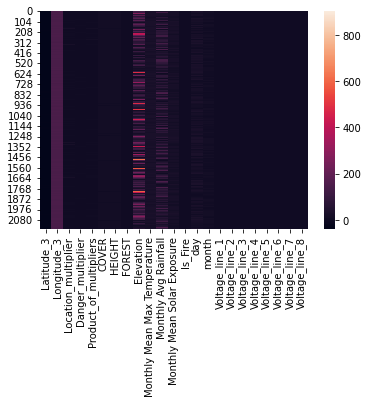

In [37]:
sns.heatmap(df)

In [7]:
X = df.loc[:, df.columns != 'Is_Fire']
y = df.loc[:,df.columns == 'Is_Fire']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Logistic Regression

In [9]:
#Logistic Regression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7488479262672811

In [10]:
clf.score(X_train, y_train)

0.7518753606462781

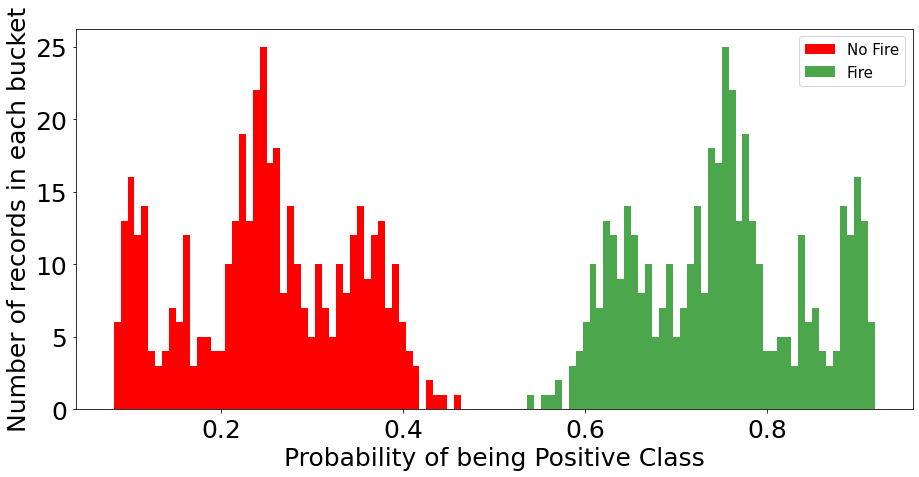

In [11]:
import matplotlib.pyplot as plt

prediction=clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [12]:
print('Classification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       109
         1.0       0.75      1.00      0.86       325

    accuracy                           0.75       434
   macro avg       0.37      0.50      0.43       434
weighted avg       0.56      0.75      0.64       434

Confusion Matrix:
 [[  0 109]
 [  0 325]]


C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [13]:
#Naive Bayes
nb = BernoulliNB().fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)
accuracy_score(y_test, y_nb_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7511520737327189

In [14]:
nb.score(X_train, y_train)

0.7501442585112522

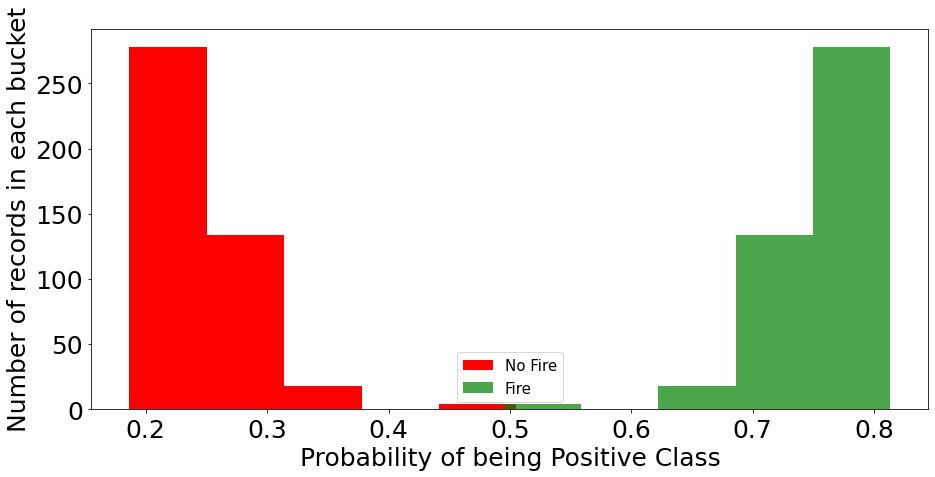

In [15]:
prediction_nb=nb.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_nb[:,0], bins=5, label='No Fire',color='r')
plt.hist(prediction_nb[:,1], bins=5, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [16]:
print('Classification Report:\n',classification_report(y_test, y_nb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_nb_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.02      0.04       109
         1.0       0.75      1.00      0.86       325

    accuracy                           0.75       434
   macro avg       0.71      0.51      0.45       434
weighted avg       0.73      0.75      0.65       434

Confusion Matrix:
 [[  2 107]
 [  1 324]]


# SVM

In [17]:
svm_clf = svm.SVC().fit(X_train, y_train)
y_svm_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_svm_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7488479262672811

In [18]:
svm_clf.score(X_train, y_train)

0.7501442585112522

In [19]:
print('Classification Report:\n',classification_report(y_test, y_svm_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_svm_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       109
         1.0       0.75      1.00      0.86       325

    accuracy                           0.75       434
   macro avg       0.37      0.50      0.43       434
weighted avg       0.56      0.75      0.64       434

Confusion Matrix:
 [[  0 109]
 [  0 325]]


C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [20]:
dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_dt_pred)

0.8110599078341014

In [21]:
dt_clf.score(X_train, y_train)

1.0

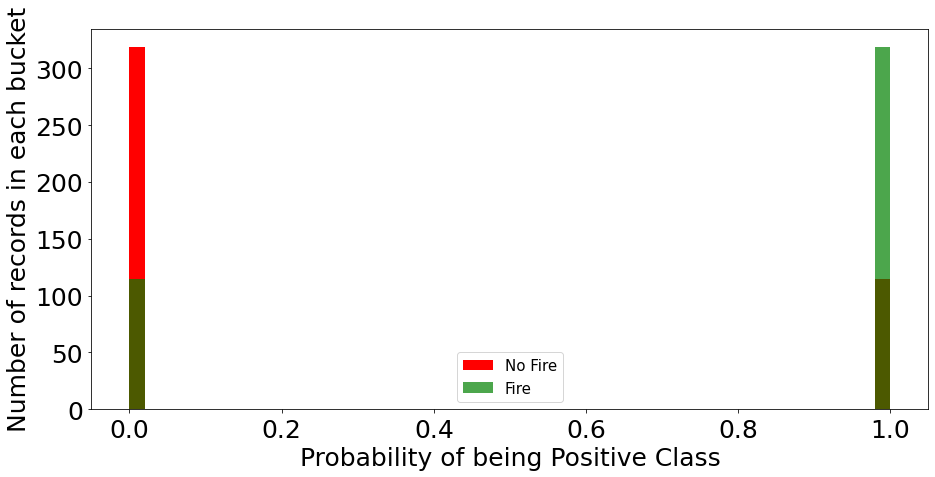

In [22]:
prediction_dt=dt_clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_dt[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_dt[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [23]:
print('Classification Report:\n',classification_report(y_test, y_dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_dt_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.65      0.63       109
         1.0       0.88      0.86      0.87       325

    accuracy                           0.81       434
   macro avg       0.75      0.76      0.75       434
weighted avg       0.81      0.81      0.81       434

Confusion Matrix:
 [[ 71  38]
 [ 44 281]]


# Random Forest

In [24]:
rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

<ipython-input-24-b1478a3aad10>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)


0.8709677419354839

In [25]:
rf_clf.score(X_train, y_train)

1.0

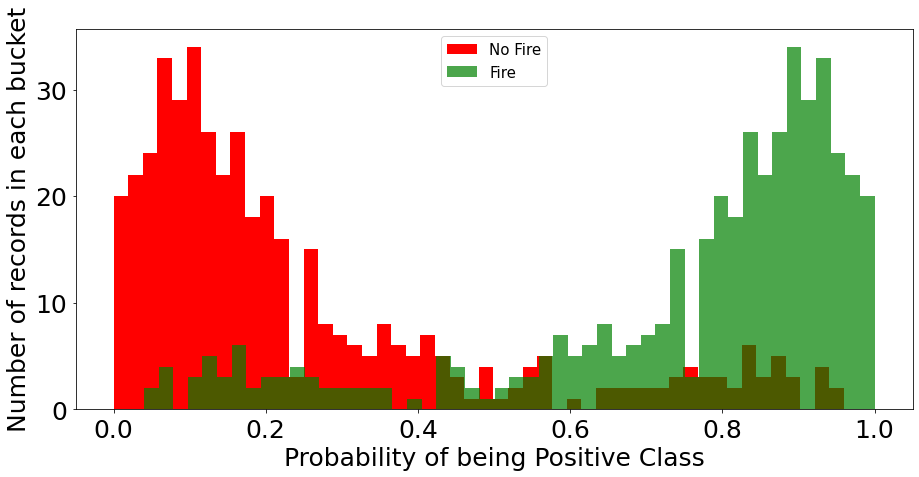

In [26]:
prediction_rf=rf_clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_rf[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_rf[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [27]:
print('Classification Report:\n',classification_report(y_test, y_rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.52      0.67       109
         1.0       0.86      0.99      0.92       325

    accuracy                           0.87       434
   macro avg       0.90      0.76      0.80       434
weighted avg       0.88      0.87      0.86       434

Confusion Matrix:
 [[ 57  52]
 [  4 321]]
